# Predicting Diamond Prices

## Dataset information
A dataset containing the prices and other features of almost 54,000 diamonds

In [310]:
#!pip install xgboost

In [1]:
# Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from xgboost import XGBRegressor
#pd.set_option('display.max_rows',50000)
#pd.set_option('display.max_columns',50000)
sns.set()



In [2]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [3]:
df = pd.read_csv('listings.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,1.443,103.796,Private room,83,180,1,10/21/2013,0.010,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,1.332,103.785,Private room,81,90,18,12/26/2014,0.280,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,1.442,103.797,Private room,69,6,20,10/1/2015,0.200,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,1.345,103.957,Private room,206,1,14,8/11/2019,0.150,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,1.346,103.960,Private room,94,1,22,7/28/2019,0.220,9,355


In [5]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                                0.000
name                              0.030
host_id                           0.000
host_name                         0.000
neighbourhood_group               0.000
latitude                          0.000
longitude                         0.000
room_type                         0.000
price                             0.000
minimum_nights                    0.000
number_of_reviews                 0.000
last_review                      34.880
reviews_per_month                34.880
calculated_host_listings_count    0.000
availability_365                  0.000
dtype: float64

In [6]:
len(df['reviews_per_month'].unique())

528

In [7]:
df['reviews_per_month'].describe()

count   5149.000
mean       1.044
std        1.286
min        0.010
25%        0.180
50%        0.550
75%        1.370
max       13.000
Name: reviews_per_month, dtype: float64

In [8]:
df['reviews_per_month'].mode()

0   1.000
dtype: float64

In [9]:
#Replace missing review entries with 0
df['reviews_per_month'].fillna(0, inplace=True)

In [10]:
df.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [11]:

(df[df['reviews_per_month']==0].isnull().sum())


id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [12]:
len(df['last_review'].unique())

1002

In [13]:
#Split last review date into year and month
df['Year'] = df['last_review'].copy()

In [14]:
df['Year'].head()

0    10/21/2013
1    12/26/2014
2     10/1/2015
3     8/11/2019
4     7/28/2019
Name: Year, dtype: object

In [15]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,1.443,103.796,Private room,83,180,1,10/21/2013,0.010,2,365,10/21/2013
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,1.332,103.785,Private room,81,90,18,12/26/2014,0.280,1,365,12/26/2014
2,56334,COZICOMFORT,266763,Francesca,North Region,1.442,103.797,Private room,69,6,20,10/1/2015,0.200,2,365,10/1/2015
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,1.345,103.957,Private room,206,1,14,8/11/2019,0.150,9,353,8/11/2019
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,1.346,103.960,Private room,94,1,22,7/28/2019,0.220,9,355,7/28/2019


In [16]:
df['Year'].isnull().sum()

2758

In [18]:
df['Year'].fillna('0/0/0000', inplace=True)

In [19]:
df['Year'] = df['Year'].str.split('/') #Spliting by /'
df['Year']

0       [10, 21, 2013]
1       [12, 26, 2014]
2        [10, 1, 2015]
3        [8, 11, 2019]
4        [7, 28, 2019]
5        [8, 15, 2019]
6        [7, 25, 2019]
7        [5, 31, 2019]
8        [4, 28, 2019]
9        [7, 31, 2019]
10       [4, 21, 2019]
11       [9, 13, 2018]
12        [1, 1, 2019]
13       [8, 22, 2019]
14        [2, 2, 2019]
15       [4, 27, 2019]
16       [8, 22, 2016]
17       [8, 11, 2019]
18        [0, 0, 0000]
19       [7, 10, 2019]
20       [8, 15, 2019]
21        [8, 7, 2017]
22        [8, 4, 2019]
23        [0, 0, 0000]
24       [8, 11, 2019]
25        [1, 7, 2018]
26        [0, 0, 0000]
27       [8, 12, 2017]
28        [0, 0, 0000]
29        [0, 0, 0000]
             ...      
7877      [0, 0, 0000]
7878      [0, 0, 0000]
7879      [0, 0, 0000]
7880      [0, 0, 0000]
7881      [0, 0, 0000]
7882      [0, 0, 0000]
7883      [0, 0, 0000]
7884      [0, 0, 0000]
7885      [0, 0, 0000]
7886      [0, 0, 0000]
7887      [0, 0, 0000]
7888      [0, 0, 0000]
7889      [

In [20]:
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year
1024,9436273,NaN,41240585,Audrey,Central Region,1.291,103.831,Private room,69,2,4,12/13/2015,0.090,1,0,"[12, 13, 2015]"
1331,11573500,NaN,61163169,Educator,Central Region,1.352,103.851,Private room,650,1,0,NaN,0.000,1,0,"[0, 0, 0000]"


In [21]:
df['Year'] = df['Year'].apply (lambda x: x[2]) # Get the year

In [22]:
df['Year'].unique()

array(['2013', '2014', '2015', '2019', '2018', '2016', '0000', '2017'],
      dtype=object)

In [23]:
df['last_review'].fillna('1/1/2012', inplace=True)

In [24]:
df.isnull().sum()

id                                0
name                              2
host_id                           0
host_name                         0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Year                              0
dtype: int64

In [25]:
len(df['host_id'].unique())

2705

In [26]:
df['name'].unique()

array(['COZICOMFORT LONG TERM STAY ROOM 2',
       'Pleasant Room along Bukit Timah', 'COZICOMFORT', ...,
       '[ Farrer Park ] New City Fringe CBD Mins to MRT',
       'Cheap Master Room in Central of Singapore',
       'Amazing room with private bathroom walk to Orchard'], dtype=object)

In [27]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7907.000,7907.000,7907.000,7907.000,7907.000,7907.000,7907.000,7907.000,7907.000,7907.000
mean,23388624.630,91144807.405,1.314,103.849,169.333,17.510,12.807,0.680,40.608,208.726
std,10164162.066,81909095.305,0.031,0.044,340.188,42.095,29.708,1.151,65.135,146.120
min,49091.000,23666.000,1.244,103.647,0.000,1.000,0.000,0.000,1.000,0.000
25%,15821800.500,23058075.000,1.296,103.836,65.000,1.000,0.000,0.000,2.000,54.000
50%,24706270.000,63448912.000,1.311,103.849,124.000,3.000,2.000,0.160,9.000,260.000
75%,32348500.000,155381142.000,1.322,103.873,199.000,10.000,10.000,0.850,48.000,355.000
max,38112762.000,288567551.000,1.455,103.973,10000.000,1000.000,323.000,13.000,274.000,365.000


In [28]:
df.shape

(7907, 16)

In [29]:
df.drop(['name','id','host_name'], axis=1, inplace=True)

In [30]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Year                              0
dtype: int64

In [31]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [32]:
df['Year'].dtype


dtype('O')

In [33]:
df['last_review'] = pd.to_datetime(df['last_review'], infer_datetime_format=True)
df.dtypes

host_id                                    int64
neighbourhood_group                       object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
Year                                      object
dtype: object

In [34]:
df['Year'] = df['Year'].astype('int64')
df.dtypes

host_id                                    int64
neighbourhood_group                       object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
Year                                       int64
dtype: object

In [35]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [36]:
len(df['neighbourhood_group'].unique())

5

In [37]:
ab = pd.get_dummies(df['neighbourhood_group'], prefix='neighbourhood_group') # Replacing the neighbourhood_group with dummies
ab 

,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,1,0,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,1,0,0,0
9,0,1,0,0,0


In [38]:
df = pd.concat([df, pd.get_dummies(df['neighbourhood_group'], prefix='neighbourhood_group', drop_first=True)], axis=1)

df 

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region
0,266763,North Region,1.443,103.796,Private room,83,180,1,2013-10-21,0.010,2,365,2013,0,1,0,0
1,227796,Central Region,1.332,103.785,Private room,81,90,18,2014-12-26,0.280,1,365,2014,0,0,0,0
2,266763,North Region,1.442,103.797,Private room,69,6,20,2015-10-01,0.200,2,365,2015,0,1,0,0
3,367042,East Region,1.345,103.957,Private room,206,1,14,2019-08-11,0.150,9,353,2019,1,0,0,0
4,367042,East Region,1.346,103.960,Private room,94,1,22,2019-07-28,0.220,9,355,2019,1,0,0,0
5,367042,East Region,1.347,103.961,Private room,104,1,39,2019-08-15,0.380,9,346,2019,1,0,0,0
6,367042,East Region,1.343,103.963,Private room,208,1,25,2019-07-25,0.250,9,172,2019,1,0,0,0
7,1017645,East Region,1.323,103.914,Private room,50,90,174,2019-05-31,1.880,4,59,2019,1,0,0,0
8,1017645,East Region,1.325,103.912,Private room,54,90,198,2019-04-28,2.080,4,133,2019,1,0,0,0
9,1017645,East Region,1.325,103.912,Private room,42,90,236,2019-07-31,2.530,4,147,2019,1,0,0,0


In [39]:
df.drop('neighbourhood_group', axis=1, inplace=True)
df

,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region
0,266763,1.443,103.796,Private room,83,180,1,2013-10-21,0.010,2,365,2013,0,1,0,0
1,227796,1.332,103.785,Private room,81,90,18,2014-12-26,0.280,1,365,2014,0,0,0,0
2,266763,1.442,103.797,Private room,69,6,20,2015-10-01,0.200,2,365,2015,0,1,0,0
3,367042,1.345,103.957,Private room,206,1,14,2019-08-11,0.150,9,353,2019,1,0,0,0
4,367042,1.346,103.960,Private room,94,1,22,2019-07-28,0.220,9,355,2019,1,0,0,0
5,367042,1.347,103.961,Private room,104,1,39,2019-08-15,0.380,9,346,2019,1,0,0,0
6,367042,1.343,103.963,Private room,208,1,25,2019-07-25,0.250,9,172,2019,1,0,0,0
7,1017645,1.323,103.914,Private room,50,90,174,2019-05-31,1.880,4,59,2019,1,0,0,0
8,1017645,1.325,103.912,Private room,54,90,198,2019-04-28,2.080,4,133,2019,1,0,0,0
9,1017645,1.325,103.912,Private room,42,90,236,2019-07-31,2.530,4,147,2019,1,0,0,0


In [40]:
df = pd.concat([df, pd.get_dummies(df['room_type'], prefix='room_type', drop_first=True)], axis=1)

df 

,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room
0,266763,1.443,103.796,Private room,83,180,1,2013-10-21,0.010,2,365,2013,0,1,0,0,1,0
1,227796,1.332,103.785,Private room,81,90,18,2014-12-26,0.280,1,365,2014,0,0,0,0,1,0
2,266763,1.442,103.797,Private room,69,6,20,2015-10-01,0.200,2,365,2015,0,1,0,0,1,0
3,367042,1.345,103.957,Private room,206,1,14,2019-08-11,0.150,9,353,2019,1,0,0,0,1,0
4,367042,1.346,103.960,Private room,94,1,22,2019-07-28,0.220,9,355,2019,1,0,0,0,1,0
5,367042,1.347,103.961,Private room,104,1,39,2019-08-15,0.380,9,346,2019,1,0,0,0,1,0
6,367042,1.343,103.963,Private room,208,1,25,2019-07-25,0.250,9,172,2019,1,0,0,0,1,0
7,1017645,1.323,103.914,Private room,50,90,174,2019-05-31,1.880,4,59,2019,1,0,0,0,1,0
8,1017645,1.325,103.912,Private room,54,90,198,2019-04-28,2.080,4,133,2019,1,0,0,0,1,0
9,1017645,1.325,103.912,Private room,42,90,236,2019-07-31,2.530,4,147,2019,1,0,0,0,1,0


In [41]:
df.drop('room_type', axis=1, inplace=True)
df

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room
0,266763,1.443,103.796,83,180,1,2013-10-21,0.010,2,365,2013,0,1,0,0,1,0
1,227796,1.332,103.785,81,90,18,2014-12-26,0.280,1,365,2014,0,0,0,0,1,0
2,266763,1.442,103.797,69,6,20,2015-10-01,0.200,2,365,2015,0,1,0,0,1,0
3,367042,1.345,103.957,206,1,14,2019-08-11,0.150,9,353,2019,1,0,0,0,1,0
4,367042,1.346,103.960,94,1,22,2019-07-28,0.220,9,355,2019,1,0,0,0,1,0
5,367042,1.347,103.961,104,1,39,2019-08-15,0.380,9,346,2019,1,0,0,0,1,0
6,367042,1.343,103.963,208,1,25,2019-07-25,0.250,9,172,2019,1,0,0,0,1,0
7,1017645,1.323,103.914,50,90,174,2019-05-31,1.880,4,59,2019,1,0,0,0,1,0
8,1017645,1.325,103.912,54,90,198,2019-04-28,2.080,4,133,2019,1,0,0,0,1,0
9,1017645,1.325,103.912,42,90,236,2019-07-31,2.530,4,147,2019,1,0,0,0,1,0


In [42]:
#Plot boxplot

len(df[df['price']>500])

198

In [43]:
df['price'].describe()

count    7907.000
mean      169.333
std       340.188
min         0.000
25%        65.000
50%       124.000
75%       199.000
max     10000.000
Name: price, dtype: float64

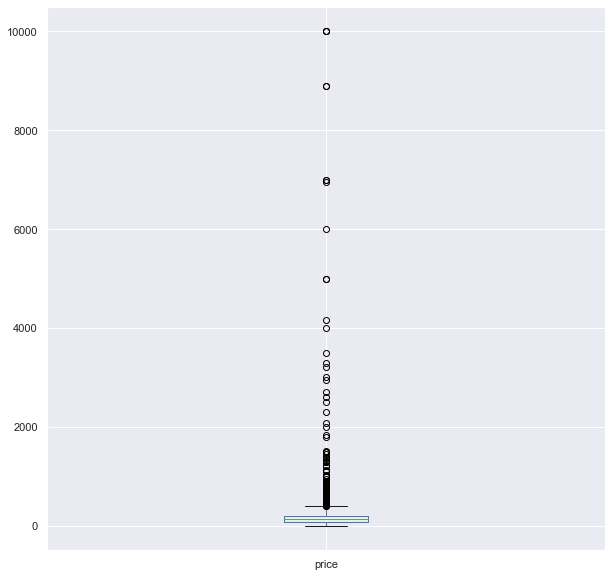

In [44]:
plt.figure(figsize=(10,10))
df['price'].plot.box()

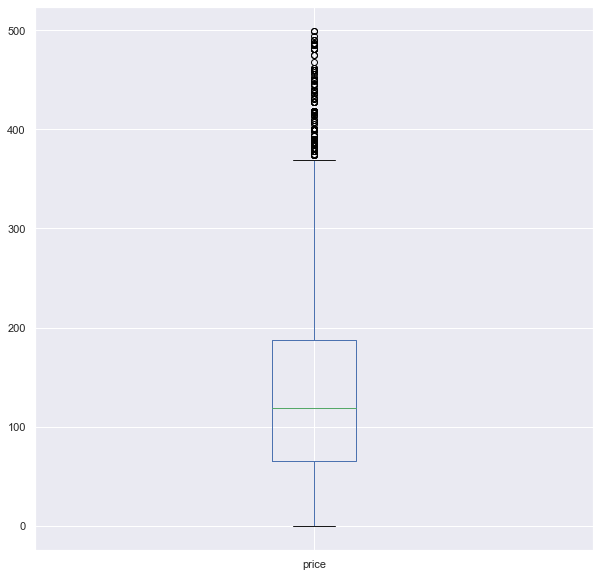

In [45]:
df1 = df[df['price']<500]
plt.figure(figsize=(10,10))
df1['price'].plot.box()

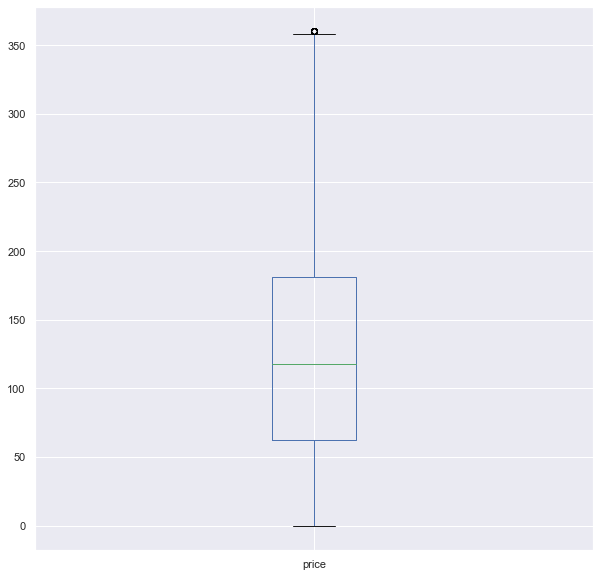

In [46]:
df1 = df1[df1['price']<=360]
plt.figure(figsize=(10,10))
df1['price'].plot.box()

In [47]:
len(df[df['price']==360])

22

In [48]:
#Create a month column
df1.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room
0,266763,1.443,103.796,83,180,1,2013-10-21,0.010,2,365,2013,0,1,0,0,1,0
1,227796,1.332,103.785,81,90,18,2014-12-26,0.280,1,365,2014,0,0,0,0,1,0
2,266763,1.442,103.797,69,6,20,2015-10-01,0.200,2,365,2015,0,1,0,0,1,0
3,367042,1.345,103.957,206,1,14,2019-08-11,0.150,9,353,2019,1,0,0,0,1,0
4,367042,1.346,103.960,94,1,22,2019-07-28,0.220,9,355,2019,1,0,0,0,1,0


In [49]:
df1.dtypes

host_id                                           int64
latitude                                        float64
longitude                                       float64
price                                             int64
minimum_nights                                    int64
number_of_reviews                                 int64
last_review                              datetime64[ns]
reviews_per_month                               float64
calculated_host_listings_count                    int64
availability_365                                  int64
Year                                              int64
neighbourhood_group_East Region                   uint8
neighbourhood_group_North Region                  uint8
neighbourhood_group_North-East Region             uint8
neighbourhood_group_West Region                   uint8
room_type_Private room                            uint8
room_type_Shared room                             uint8
dtype: object

In [50]:
df1['Month'] = df1['last_review'].dt.month
df1['Month'].to_frame().head()

,Month
0,10
1,12
2,10
3,8
4,7


In [51]:
df1.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,Month
0,266763,1.443,103.796,83,180,1,2013-10-21,0.010,2,365,2013,0,1,0,0,1,0,10
1,227796,1.332,103.785,81,90,18,2014-12-26,0.280,1,365,2014,0,0,0,0,1,0,12
2,266763,1.442,103.797,69,6,20,2015-10-01,0.200,2,365,2015,0,1,0,0,1,0,10
3,367042,1.345,103.957,206,1,14,2019-08-11,0.150,9,353,2019,1,0,0,0,1,0,8
4,367042,1.346,103.960,94,1,22,2019-07-28,0.220,9,355,2019,1,0,0,0,1,0,7


In [52]:
df1['Month'].unique() #Get average price per month and plot a line graph

array([10, 12,  8,  7,  5,  4,  9,  2,  1,  3,  6, 11], dtype=int64)

In [53]:
df1.dtypes

host_id                                           int64
latitude                                        float64
longitude                                       float64
price                                             int64
minimum_nights                                    int64
number_of_reviews                                 int64
last_review                              datetime64[ns]
reviews_per_month                               float64
calculated_host_listings_count                    int64
availability_365                                  int64
Year                                              int64
neighbourhood_group_East Region                   uint8
neighbourhood_group_North Region                  uint8
neighbourhood_group_North-East Region             uint8
neighbourhood_group_West Region                   uint8
room_type_Private room                            uint8
room_type_Shared room                             uint8
Month                                           

In [54]:
#Checking for multicollinearity
cors = df1.corr(method='pearson')
cors

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,Month
host_id,1.000,-0.035,-0.018,0.137,-0.087,-0.172,0.043,-0.065,0.031,-0.185,-0.034,-0.004,-0.021,0.004,-0.099,0.003,-0.144
latitude,-0.035,1.000,-0.040,-0.193,0.079,-0.010,-0.029,-0.158,-0.066,-0.039,0.133,0.561,0.426,0.265,0.226,-0.064,-0.020
longitude,-0.018,-0.040,1.000,0.027,-0.035,0.106,0.100,0.050,-0.040,0.031,0.487,-0.130,0.151,-0.677,-0.062,-0.020,0.025
price,0.137,-0.193,0.027,1.000,-0.104,-0.063,-0.011,0.239,0.102,-0.076,-0.084,-0.082,-0.135,-0.097,-0.539,-0.237,-0.063
minimum_nights,-0.087,0.079,-0.035,-0.104,1.000,-0.079,-0.152,-0.014,0.161,-0.166,0.046,0.044,0.063,0.028,0.079,-0.077,-0.143
number_of_reviews,-0.172,-0.010,0.106,-0.063,-0.079,1.000,0.678,-0.152,-0.068,0.316,0.056,-0.018,-0.005,-0.061,0.027,-0.002,0.322
reviews_per_month,0.043,-0.029,0.100,-0.011,-0.152,0.678,1.000,-0.181,-0.110,0.431,0.017,-0.012,-0.008,-0.074,0.009,-0.028,0.456
calculated_host_listings_count,-0.065,-0.158,0.050,0.239,-0.014,-0.152,-0.181,1.000,0.247,-0.116,-0.115,-0.065,-0.125,-0.077,-0.336,-0.077,-0.141
availability_365,0.031,-0.066,-0.040,0.102,0.161,-0.068,-0.110,0.247,1.000,-0.067,-0.060,0.008,-0.060,-0.034,-0.051,0.111,-0.061
Year,-0.185,-0.039,0.031,-0.076,-0.166,0.316,0.431,-0.116,-0.067,1.000,0.018,-0.041,-0.010,-0.016,0.015,0.029,0.799


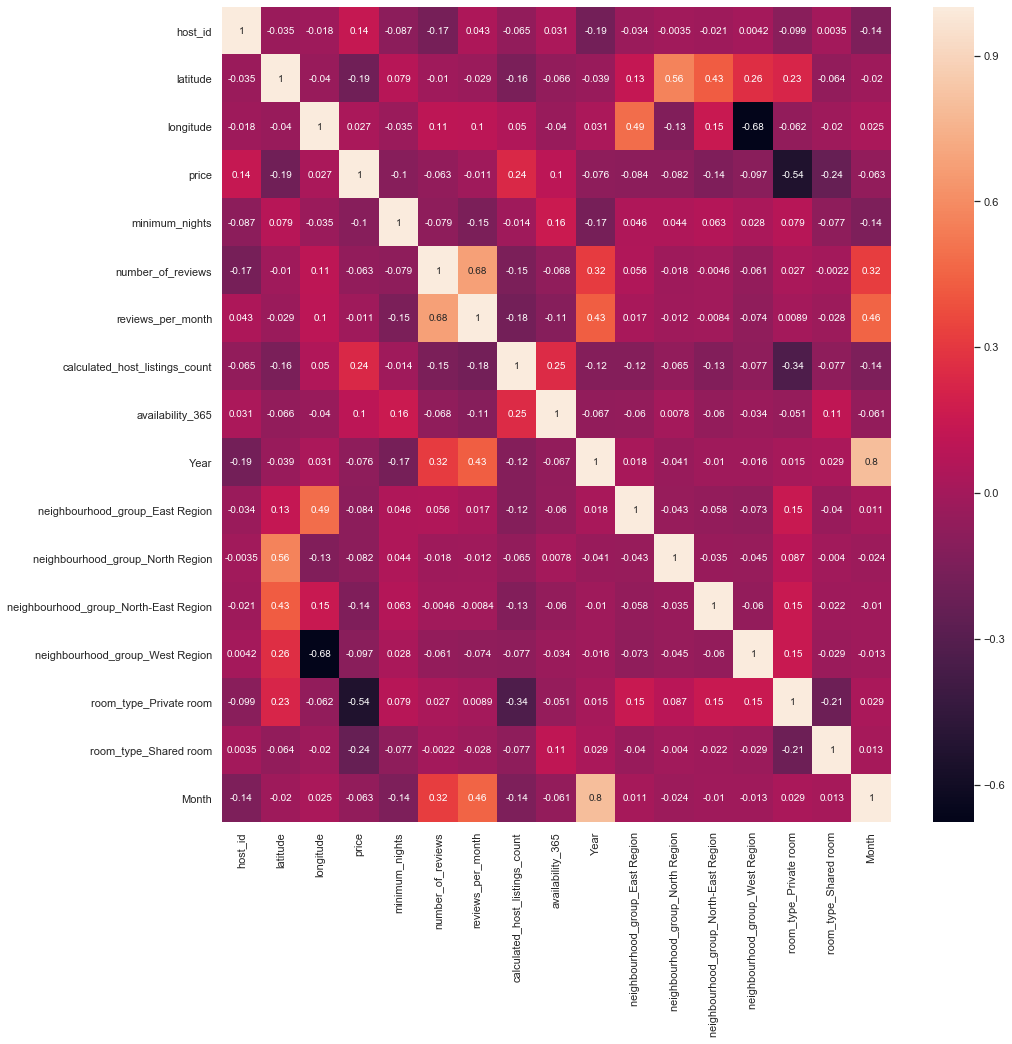

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(cors, annot=True)

In [56]:
df1.shape

(7465, 18)

In [57]:
X = df1.drop(['price', 'last_review'], axis=1)
X

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,Month
0,266763,1.443,103.796,180,1,0.010,2,365,2013,0,1,0,0,1,0,10
1,227796,1.332,103.785,90,18,0.280,1,365,2014,0,0,0,0,1,0,12
2,266763,1.442,103.797,6,20,0.200,2,365,2015,0,1,0,0,1,0,10
3,367042,1.345,103.957,1,14,0.150,9,353,2019,1,0,0,0,1,0,8
4,367042,1.346,103.960,1,22,0.220,9,355,2019,1,0,0,0,1,0,7
5,367042,1.347,103.961,1,39,0.380,9,346,2019,1,0,0,0,1,0,8
6,367042,1.343,103.963,1,25,0.250,9,172,2019,1,0,0,0,1,0,7
7,1017645,1.323,103.914,90,174,1.880,4,59,2019,1,0,0,0,1,0,5
8,1017645,1.325,103.912,90,198,2.080,4,133,2019,1,0,0,0,1,0,4
9,1017645,1.325,103.912,90,236,2.530,4,147,2019,1,0,0,0,1,0,7


In [58]:
X.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,Month
0,266763,1.443,103.796,180,1,0.010,2,365,2013,0,1,0,0,1,0,10
1,227796,1.332,103.785,90,18,0.280,1,365,2014,0,0,0,0,1,0,12
2,266763,1.442,103.797,6,20,0.200,2,365,2015,0,1,0,0,1,0,10
3,367042,1.345,103.957,1,14,0.150,9,353,2019,1,0,0,0,1,0,8
4,367042,1.346,103.960,1,22,0.220,9,355,2019,1,0,0,0,1,0,7


In [59]:
y = df1['price']
y.head()

0     83
1     81
2     69
3    206
4     94
Name: price, dtype: int64

In [60]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X,y)

imp = pd.DataFrame(mutual_info_classif(X,y), index=X.columns)

imp

imp.columns = ['Importance']

imp.sort_values(by='Importance', ascending = False)

,Importance
host_id,0.735
calculated_host_listings_count,0.642
longitude,0.400
latitude,0.348
room_type_Private room,0.268
minimum_nights,0.252
availability_365,0.231
Year,0.107
Month,0.106
room_type_Shared room,0.072


In [61]:
imp[imp['Importance']>=0.07].sort_values(by='Importance', ascending=False)

,Importance
host_id,0.735
calculated_host_listings_count,0.642
longitude,0.400
latitude,0.348
room_type_Private room,0.268
minimum_nights,0.252
availability_365,0.231
Year,0.107
Month,0.106
room_type_Shared room,0.072


In [65]:
df1.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,Month
0,266763,1.443,103.796,83,180,1,2013-10-21,0.010,2,365,2013,0,1,0,0,1,0,10
1,227796,1.332,103.785,81,90,18,2014-12-26,0.280,1,365,2014,0,0,0,0,1,0,12
2,266763,1.442,103.797,69,6,20,2015-10-01,0.200,2,365,2015,0,1,0,0,1,0,10
3,367042,1.345,103.957,206,1,14,2019-08-11,0.150,9,353,2019,1,0,0,0,1,0,8
4,367042,1.346,103.960,94,1,22,2019-07-28,0.220,9,355,2019,1,0,0,0,1,0,7


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
X.columns

Index(['host_id', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Year',
       'neighbourhood_group_East Region', 'neighbourhood_group_North Region',
       'neighbourhood_group_North-East Region',
       'neighbourhood_group_West Region', 'room_type_Private room',
       'room_type_Shared room', 'Month'],
      dtype='object')

In [74]:
scaler = StandardScaler() #Prepare the scalar


In [79]:
#Fitting the scaler
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
X = scaler.transform(X)

In [76]:
#scaler.fit_transform(X) - You could have done both the fitting and the transforming in one line

In [81]:
X

array([[-1.09275123,  4.17139226, -1.20172933, ...,  1.1243574 ,
        -0.23382999,  1.55262719],
       [-1.09322673,  0.57551096, -1.44115617, ...,  1.1243574 ,
        -0.23382999,  2.14302333],
       [-1.09275123,  4.16845551, -1.1820597 , ...,  1.1243574 ,
        -0.23382999,  1.55262719],
       ...,
       [ 2.3384184 , -0.06045752,  0.24884914, ...,  1.1243574 ,
        -0.23382999, -1.10415547],
       [ 1.87943483, -0.62920717, -0.24741329, ...,  1.1243574 ,
        -0.23382999, -1.10415547],
       [-0.74470955, -0.58711382, -0.35503102, ...,  1.1243574 ,
        -0.23382999, -1.10415547]])

In [82]:
#Splitting our data into the testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Model Evaluation

### LINEAR REGRESSION

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [84]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LinearRegression

# 2. Create an instance of the estimator
linear_regression = LinearRegression()

# 3. Use the training data to train the estimator
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
#Prediction and Model Evaluation (R-squared, MSE, RMSE, MAE)
y_train_pred1 = linear_regression.predict(X_train)  # Train
y_pred1 = linear_regression.predict(X_test) # Test (new)

print('Train r2 score: ', r2_score(y_train_pred1, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred1))

print('Train_mae: ', mean_absolute_error(y_train_pred1, y_train))
print('Test_mae: ', mean_absolute_error(y_test, y_pred1))

print('Train_mse1: ', mean_squared_error(y_train_pred1, y_train))
print('Test_mse1: ', mean_squared_error(y_test, y_pred1))

Train r2 score:  -0.17854841858470638
Test r2 score:  0.4465595022064158
Train_mae:  45.344789871348006
Test_mae:  46.51247338828281
Train_mse1:  3523.179558576528
Test_mse1:  3642.0848490740673


In [93]:
#Prediction and Model Evaluation (R-squared, MSE, RMSE, MAE)
y_train_pred1 = linear_regression.predict(X_train)  # Train
y_pred1 = linear_regression.predict(X_test) # Test (new)

print('Train r2 score: ', r2_score(y_train, y_train_pred1))
print('Test r2 score: ', r2_score(y_test, y_pred1))

print('Train_mae: ', mean_absolute_error(y_train, y_train_pred1))
print('Test_mae: ', mean_absolute_error(y_test, y_pred1))

print('Train_mse1: ', mean_squared_error(y_train, y_train_pred1))
print('Test_mse1: ', mean_squared_error(y_test, y_pred1))

Train r2 score:  0.45902124160712954
Test r2 score:  0.4465595022064158
Train_mae:  45.344789871348006
Test_mae:  46.51247338828281
Train_mse1:  3523.179558576528
Test_mse1:  3642.0848490740673


In [94]:
d = pd.DataFrame({'OLD':y_test, 'NEW':y_pred1})

In [95]:
d

,OLD,NEW
6013,157,179.955
4723,144,119.717
6570,131,102.864
3924,100,180.967
629,268,173.126
557,50,74.412
7504,247,189.214
5007,128,177.888
5146,71,91.687
3407,250,179.047


In [96]:
e = pd.DataFrame({'OLD':y_train, 'NEW':y_train_pred1})

In [97]:
e

,OLD,NEW
7434,115,197.183
2762,54,93.928
3338,300,151.489
117,140,157.802
7616,60,106.669
3537,36,97.417
6585,90,101.204
2721,303,196.664
3842,94,81.598
1044,40,68.480


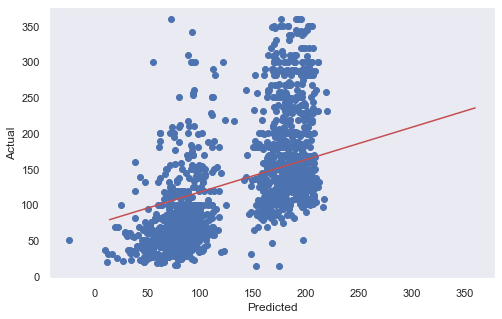

In [102]:
plt.subplots(figsize=(8,5))
plt.scatter(y_pred1, y_test)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred1, 1))(np.unique(y_test)),c='r')
plt.title=('Prediction vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()

In [103]:
# 1. import the estimator object
from sklearn.neighbors import KNeighborsRegressor

# 2. Create an instance of the estimator
knn = KNeighborsRegressor()

#3. Use the training data to train the estimator
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [107]:
#Prediction and Model Evaluation (R-squared, MSE, RMSE, MAE)
y_train_pred2 = knn.predict(X_train)  # Train
y_pred2 = knn.predict(X_test) # Test (new)

print('Train r2 score: ', r2_score(y_train, y_train_pred2))
print('Test r2 score: ', r2_score(y_test, y_pred2))

print('Train_mae: ', mean_absolute_error(y_train_pred2, y_train))
print('Test_mae: ', mean_absolute_error(y_test, y_pred2))

print('Train_mse1: ', mean_squared_error(y_train_pred2, y_train))
print('Test_mse1: ', mean_squared_error(y_test, y_pred2))

Train r2 score:  0.7171263131024938
Test r2 score:  0.5500513169013903
Train_mae:  30.230241125251172
Test_mae:  38.54614869390488
Train_mse1:  1842.243851306095
Test_mse1:  2961.025237776289


In [111]:
f = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred2})
f
f['Difference'] = f['Actual'] - f['Predicted']
f.head()

,Actual,Predicted,Difference
6013,157,118.200,38.800
4723,144,96.200,47.800
6570,131,126.600,4.400
3924,100,183.800,-83.800
629,268,176.600,91.400


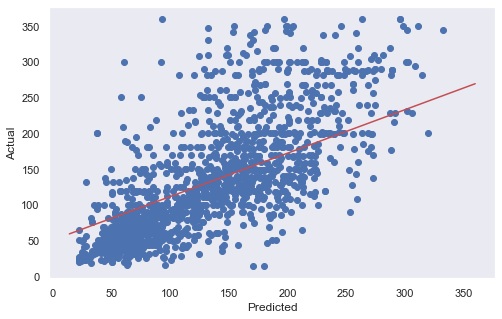

In [113]:
#Plot for KNN Algorithm
plt.subplots(figsize=(8,5))
plt.scatter(y_pred2, y_test)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred2, 1))(np.unique(y_test)),c='r')
plt.title=('Prediction vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()

## Decision Tree

In [112]:
# 1. import the estimator object
from sklearn.tree import DecisionTreeRegressor

# 2. Create an instance of the estimator
dtree = DecisionTreeRegressor()

#3. Use the training data to train the estimator
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [115]:
#Prediction and Model Evaluation (R-squared, MSE, RMSE, MAE)
y_train_pred3 = dtree.predict(X_train)  # Train
y_pred3 = dtree.predict(X_test) # Test (new)

print('Train r2 score: ', r2_score(y_train, y_train_pred3))
print('Test r2 score: ', r2_score(y_test, y_pred3))

print('Train_mae: ', mean_absolute_error(y_train_pred3, y_train))
print('Test_mae: ', mean_absolute_error(y_test, y_pred3))

print('Train_mse1: ', mean_squared_error(y_train_pred3, y_train))
print('Test_mse1: ', mean_squared_error(y_test, y_pred3))

Train r2 score:  1.0
Test r2 score:  0.3842873044837527
Train_mae:  0.0
Test_mae:  40.92967180174146
Train_mse1:  0.0
Test_mse1:  4051.8861352980575


## Random Forest

In [116]:

# 1. import the estimator object
from sklearn.ensemble import RandomForestRegressor

# 2. Create an instance of the estimator
rf = RandomForestRegressor()

#3. Use the training data to train the estimator
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [118]:
#Prediction and Model Evaluation (R-squared, MSE, RMSE, MAE)
y_train_pred4 = rf.predict(X_train)  # Train
y_pred4 = rf.predict(X_test) # Test (new)

print('Train r2 score: ', r2_score(y_train, y_train_pred4))
print('Test r2 score: ', r2_score(y_test, y_pred4))

print('Train_mae: ', mean_absolute_error(y_train_pred4, y_train))
print('Test_mae: ', mean_absolute_error(y_test, y_pred4))

print('Train_mse1: ', mean_squared_error(y_train_pred4, y_train))
print('Test_mse1: ', mean_squared_error(y_test, y_pred4))

Train r2 score:  0.9373974527924593
Test r2 score:  0.6561405388093283
Train_mae:  12.95160750167448
Test_mae:  33.104755525787006
Train_mse1:  407.7054989953115
Test_mse1:  2262.8725920964503


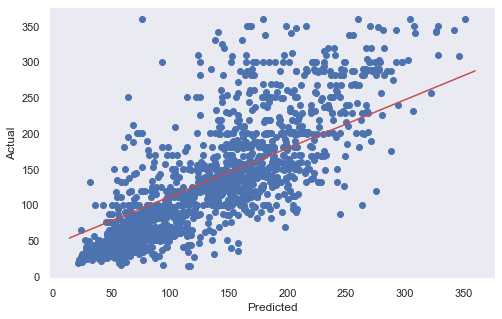

In [120]:
#Plot for RandomForestRegressor Algorithm
plt.subplots(figsize=(8,5))
plt.scatter(y_pred4, y_test)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred4, 1))(np.unique(y_test)),c='r')
plt.title=('Prediction vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()

In [122]:
g = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred4})

g['Difference'] = g['Actual'] - g['Predicted']
g.head(20)

,Actual,Predicted,Difference
6013,157,162.700,-5.700
4723,144,133.300,10.700
6570,131,105.100,25.900
3924,100,137.200,-37.200
629,268,241.100,26.900
557,50,82.200,-32.200
7504,247,228.600,18.400
5007,128,190.500,-62.500
5146,71,64.600,6.400
3407,250,245.100,4.900


## XGBOOST

In [128]:
from xgboost import XGBRegressor
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [132]:
y_train_pred5 = xgb_model1.predict(X_train)
y_pred5 = xgb_model1.predict(X_test)


print('Train r2 score: ', r2_score(y_train, y_train_pred5))
print('Test r2 score: ', r2_score(y_test, y_pred5))

print('Train_mae: ', mean_absolute_error(y_train_pred5, y_train))
print('Test_mae: ', mean_absolute_error(y_test, y_pred5))

print('Train_mse1: ', mean_squared_error(y_train_pred5, y_train))
print('Test_mse1: ', mean_squared_error(y_test, y_pred5))

Train r2 score:  0.9136712383708426
Test r2 score:  0.6733236373911916
Train_mae:  16.698304082751672
Test_mae:  32.96756953196644
Train_mse1:  562.2248999066828
Test_mse1:  2149.7939445188895


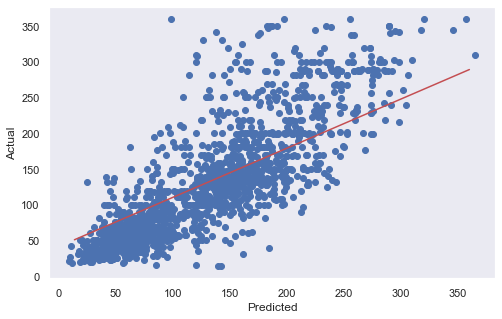

In [133]:
#Plot for XGBoost Algorithm
plt.subplots(figsize=(8,5))
plt.scatter(y_pred5, y_test)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred5, 1))(np.unique(y_test)),c='r')
plt.title=('Prediction vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()

### Model Optimization
Using Grid Search CV for Optimization

In [134]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [135]:
# Checking the parameters that can be optimized
rf.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [139]:
#param_grid = ({
  #  'n_estimators':[10, 100, 1000],
   # 'n_jobs':[2,4,6,8],
    #'max_depth':[2,10,100]
#}, 
  #  {
   #  'n_estimators':[10, 100, 1000],
    #'max_depth':[2,10,100],
    #'n_jobs':[2,4,6,8]})
    
#grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', return_train_score=True)

#grid_search = grid_search.fit(X_train, y_train)

In [152]:
rf = RandomForestRegressor(max_depth=10, n_estimators=100, n_jobs=2)

rf.fit(X_train, y_train)

#Prediction and Model Evaluation (R-squared, MSE, RMSE, MAE)
y_train_pred4a = rf.predict(X_train)  # Train
y_pred4a = rf.predict(X_test) # Test (new)

print('Train r2 score: ', r2_score(y_train, y_train_pred4a))
print('Test r2 score: ', r2_score(y_test, y_pred4a))

print('Train_mae: ', mean_absolute_error(y_train_pred4a, y_train))
print('Test_mae: ', mean_absolute_error(y_test, y_pred4a))

print('Train_mse1: ', mean_squared_error(y_train_pred4a, y_train))
print('Test_mse1: ', mean_squared_error(y_test, y_pred4a))

Train r2 score:  0.810286219590652
Test r2 score:  0.6569660379130747
Train_mae:  25.501691082015277
Test_mae:  34.21221175446364
Train_mse1:  1235.5304210171735
Test_mse1:  2257.440142193226


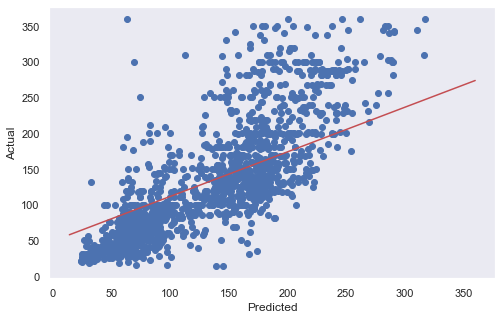

In [153]:
#Plot for RandomForestRegressor Algorithm for the Second one
plt.subplots(figsize=(8,5))
plt.scatter(y_pred4a, y_test)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred4a, 1))(np.unique(y_test)),c='r')
plt.title=('Prediction vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()

In [154]:
g1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred4a})

g1['Difference'] = g1['Actual'] - g1['Predicted']
g1.head(20)

,Actual,Predicted,Difference
6013,157,183.505,-26.505
4723,144,125.874,18.126
6570,131,92.640,38.360
3924,100,162.299,-62.299
629,268,220.767,47.233
557,50,79.710,-29.710
7504,247,206.784,40.216
5007,128,173.742,-45.742
5146,71,65.474,5.526
3407,250,213.992,36.008


## Validation

In [155]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [156]:
#use this to check the evaluation scores available for use in your validation
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [157]:
# I will be using 'r' evaluation metric to carry out validation on the linear regression
scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=10)

def display_scores(scores):
    print('scores:', scores)
    print('mean:', scores.mean())
    print('standard deviation:', scores.std())

display_scores(scores)

scores: [0.66037951 0.66017793 0.67945257 0.68377615 0.68692509 0.63266703
 0.64865758 0.63055326 0.66362038 0.63187363]
mean: 0.6578083126641472
standard deviation: 0.020415341636570262


Interpreting this, we can say that our model has an actual r2 score of 68% +/- 2.2

In [158]:
import pickle
from pickle import dump

In [161]:
#Save the model
dump(rf, open('model_rf.pkl', 'wb'))

#Save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

In [162]:
# How to load the model from disk
model = pickle.load(open('model_rf.pkl', 'rb'))
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [1]:
import streamlit as st

In [18]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np


st.write('# My New App')
st.markdown('My upcoming app')
st.number_input('Choose your age',step=1, min_value=18, max_value=65)

st.selectbox('Choose your State',['Enugu','Jigawa','Gombe'])
z=x+y
st.write(z)

Overwriting app.py


In [17]:
!streamlit run app.py

^C
